Задание 1 Гаусовво размытие



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_to_model = '/content/drive/MyDrive/Colab Notebooks/Vadim/house.jpg'
path_to_model1 = '/content/drive/MyDrive/Colab Notebooks/snapshot1201.png'

In [ ]:
!pip install pca

In [ ]:
!pip install imshow

In [ ]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
import matplotlib as plt

#plt.pyplot.imshow(Image.open(path_to_model))
#plt.pyplot.show()

im = array(Image.open(path_to_model).convert('L'))

im2 = filters.gaussian_filter(im,5)
plt.imshow()
plt.pyplot.show()


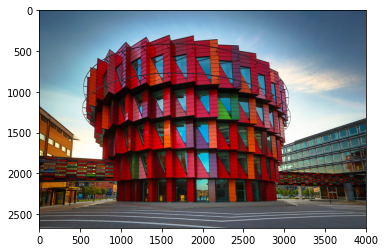

In [13]:
import numpy as np
import matplotlib as plt
from PIL import Image
from numpy import *
from scipy.ndimage import filters

plt.pyplot.imshow(Image.open(path_to_model))
plt.pyplot.show()

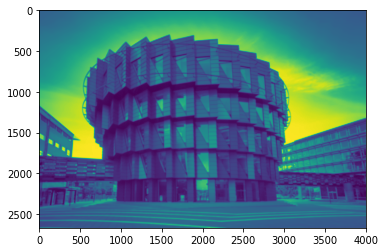

In [12]:
import numpy as np
import matplotlib as plt
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open(path_to_model).convert('L'))

im2 = filters.gaussian_filter(im,5)

plt.pyplot.imshow(im2)
plt.pyplot.show()

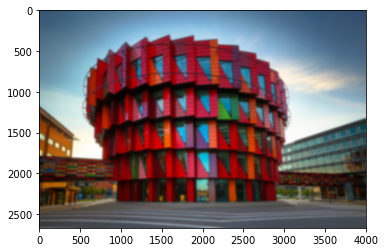

In [17]:
import numpy as np
import matplotlib as plt
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open(path_to_model))
im2 = zeros(im.shape)
for i in range(3):
  im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
im2 = uint8(im2)
plt.pyplot.imshow(im2)
plt.pyplot.show()

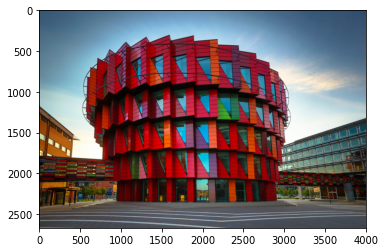

In [16]:
import numpy as np
import matplotlib as plt
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open(path_to_model))
im2 = zeros(im.shape)
for i in range(3):
  im2[:,:,i] = filters.gaussian_filter(im[:,:,i],2)
im2 = uint8(im2)
plt.pyplot.imshow(im2)
plt.pyplot.show()

Задача 2

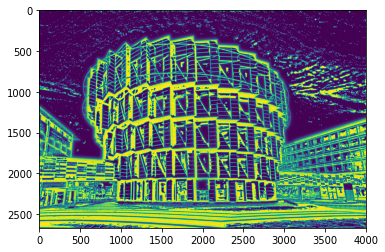

In [20]:
import numpy as np
import matplotlib as plt
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im1 = array(Image.open(path_to_model).convert('L'))
im2 = filters.gaussian_filter(im1, 20)
im3 = im1 - im2

plt.pyplot.imshow(im3)
plt.pyplot.show()

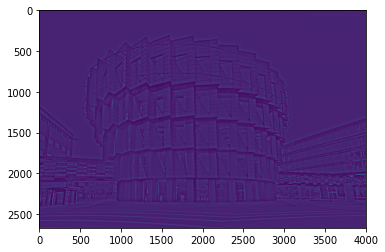

In [21]:
import numpy as np
import matplotlib as plt
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im1 = array(Image.open(path_to_model).convert('L'))
im2 = filters.gaussian_filter(im1, 20)
im3 = im1/im2

plt.pyplot.imshow(im3)
plt.pyplot.show()

In [22]:
imx = zeros(im1.shape)

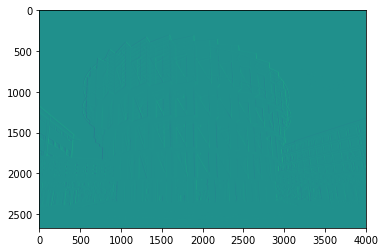

In [23]:

import matplotlib as plt
imx = zeros(im1.shape)

filters.sobel(im1, 1, imx)

plt.pyplot.imshow(imx)
plt.pyplot.show()

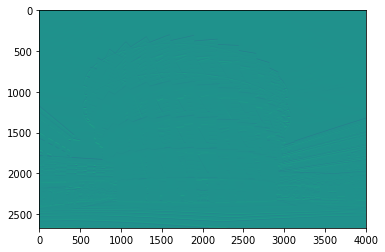

In [24]:
import matplotlib as plt
imy = zeros(im1.shape)

filters.sobel(im1, 0, imy)

plt.pyplot.imshow(imy)
plt.pyplot.show()

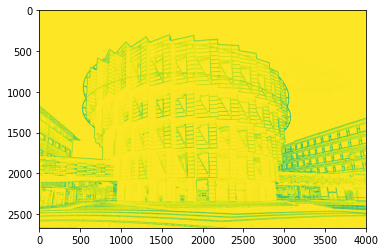

In [25]:
import matplotlib as plt
imxy = sqrt(imx ** 2 + imy ** 2)

plt.pyplot.imshow(-imxy)
plt.pyplot.show()

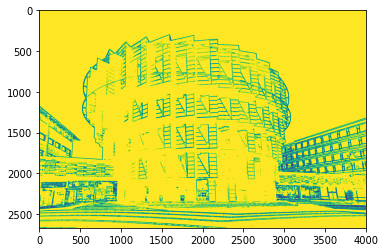

In [26]:
from scipy.ndimage import measurements, morphology
import matplotlib as plt
imbin = 1 * (imxy < 128)

plt.pyplot.imshow(imbin)
plt.pyplot.show()

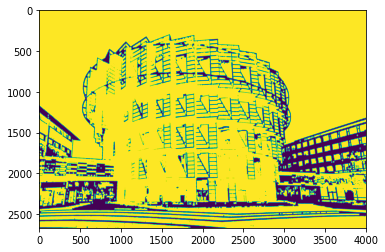

In [28]:
im_open = morphology.binary_opening(imbin, ones((9, 5)), iterations=2)

plt.pyplot.imshow(im_open)
plt.pyplot.show()

In [33]:
labels_open, objects_open = measurements.label(im_open)
labels_open,objects_open


(array([[  1,   1,   1, ...,   1,   1,   1],
        [  1,   1,   1, ...,   1,   1,   1],
        [  1,   1,   1, ...,   1,   1,   1],
        ...,
        [  0,   0,   0, ..., 577, 577, 577],
        [  0,   0,   0, ..., 577, 577, 577],
        [  0,   0,   0, ..., 577, 577, 577]], dtype=int32), 579)

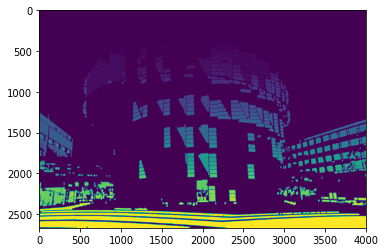

In [34]:
plt.pyplot.imshow(labels_open)
plt.pyplot.show()

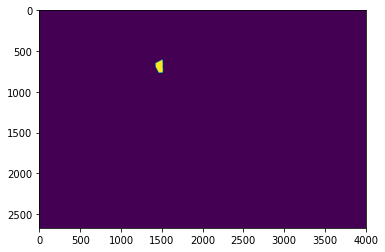

In [35]:
plt.pyplot.imshow(1 * (labels_open == 31))
plt.pyplot.show()

In [36]:
hist(labels_open.flatten(), 5)

In [37]:
measurements.center_of_mass(labels_open)

(2207.6773066152377, 1971.6352722702682)

In [38]:
centers = np.zeros(im.shape[:2], dtype=np.int64)

In [39]:
for i in range(2, 35):
    mas = 1 * (labels_open == i)
    center = measurements.center_of_mass(mas)
    centers[int(center[0]) - 5: int(center[0]) + 5, int(center[1]) - 5:int(center[1]) + 5] = 1

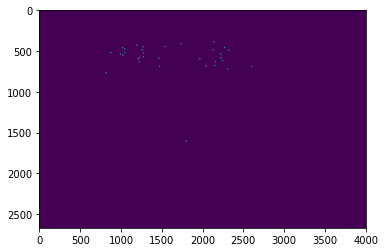

In [40]:
plt.pyplot.imshow(centers)
plt.pyplot.show()

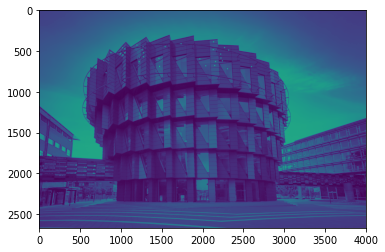

In [41]:
plt.pyplot.imshow(im1 + 255 * centers)
plt.pyplot.show()

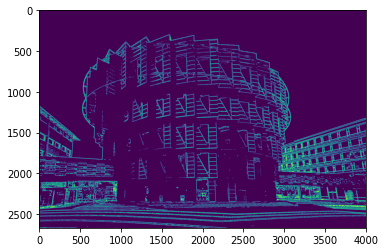

In [42]:
plt.pyplot.imshow(255 * (imxy > 128))

plt.pyplot.show()

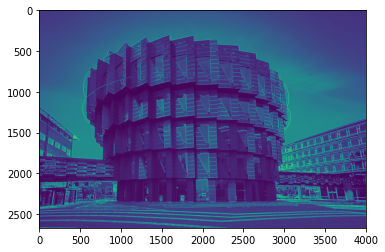

In [44]:
plt.pyplot.imshow(im1 + 255 * (imxy > 128))

plt.pyplot.show()